In [1]:
%matplotlib inline

In [2]:
from collections import namedtuple
import re
from itertools import chain
from os.path import isdir

In [3]:
import xmltodict
from matplotlib import pyplot as plt
import numpy as np

In [4]:
Alignment = namedtuple('Alignment', ['tx', 'ty', 'tz', 'rx', 'ry', 'rz'])

In [5]:
def parse_xml(fn):
    with open(fn, 'rt') as f:
        modules_xml = xmltodict.parse(f.read())
    
    alignment = {}
    for module in modules_xml['DDDB']['condition']:
        assert module['@classID'] == '6'
        module_number, = map(int, re.match('Module(\d+)', module['@name']).groups())
        tx, ty, tz, rx, ry, rz = [None]*6
        for param in module['paramVector']:
            if param['@name'] == 'dPosXYZ':
                tx, ty, tz = map(float, param['#text'].split(' '))
            elif param['@name'] == 'dRotXYZ':
                rx, ry, rz = map(float, param['#text'].split(' '))
            else:
                raise ValueError(param)
        assert None not in [tx, ty, tz, rx, ry, rz]
        alignment[module_number] = Alignment(tx, ty, tz, rx, ry, rz)
    return alignment

In [6]:
bins = {
    'tx': (np.linspace(-0.105, 0.105, 22), 'mm'),
    'ty': (np.linspace(-0.105, 0.105, 22), 'mm'),
    'tz': (np.linspace(-1.05, 1.05, 22), 'mm'),
    'rx': (np.linspace(-0.00105, 0.00105, 22), 'rad'),
    'ry': (np.linspace(-0.01575, 0.01575, 22), 'rad'),
    'rz': (np.linspace(-0.00105, 0.00105, 22), 'rad'),
}

In [7]:
def plot_alignment(var, ax, title, fn):
    _bins, unit = bins[var]
    params = parse_xml(fn)
    ax.hist([getattr(a, var) for a in params.values()], bins=_bins, histtype='step', lw=1)
    ax.set_xlim(min(_bins), max(_bins))
    ax.set_xlabel(f'{title} - {var} [{unit}]')

In [8]:
def plot(scenario):
    module_fn = 'Conditions/VP/Alignment/Modules.xml'
    for var, (_bins, unit) in bins.items():
        fig, axes = plt.subplots(2, 4, sharex='none', sharey='none', figsize=(12,6))
        plot_alignment(var, axes[0][0], 'Initial', f'../output/scenarios/{scenario}/SIMCOND/{module_fn}')
        for i, ax in enumerate(list(chain(*axes))[1:]):
            if isdir(f'v2_100kevents/AlignmentResults/Iter{i}/xml/'):
                plot_alignment(var, ax, f'Iteration {i}', f'v2_100kevents/AlignmentResults/Iter{i}/xml/{module_fn}')
            else:
                print(f'Error - Skipped {scenario} {var} Iteration {i}')
        fig.suptitle(f'{scenario} - {var}', y=1.02)
        plt.tight_layout()

Error - Skipped tip_x=0um_y=-1000um tx Iteration 4
Error - Skipped tip_x=0um_y=-1000um tx Iteration 5
Error - Skipped tip_x=0um_y=-1000um tx Iteration 6
Error - Skipped tip_x=0um_y=-1000um ty Iteration 4
Error - Skipped tip_x=0um_y=-1000um ty Iteration 5
Error - Skipped tip_x=0um_y=-1000um ty Iteration 6
Error - Skipped tip_x=0um_y=-1000um tz Iteration 4
Error - Skipped tip_x=0um_y=-1000um tz Iteration 5
Error - Skipped tip_x=0um_y=-1000um tz Iteration 6
Error - Skipped tip_x=0um_y=-1000um rx Iteration 4
Error - Skipped tip_x=0um_y=-1000um rx Iteration 5
Error - Skipped tip_x=0um_y=-1000um rx Iteration 6
Error - Skipped tip_x=0um_y=-1000um ry Iteration 4
Error - Skipped tip_x=0um_y=-1000um ry Iteration 5
Error - Skipped tip_x=0um_y=-1000um ry Iteration 6
Error - Skipped tip_x=0um_y=-1000um rz Iteration 4
Error - Skipped tip_x=0um_y=-1000um rz Iteration 5
Error - Skipped tip_x=0um_y=-1000um rz Iteration 6


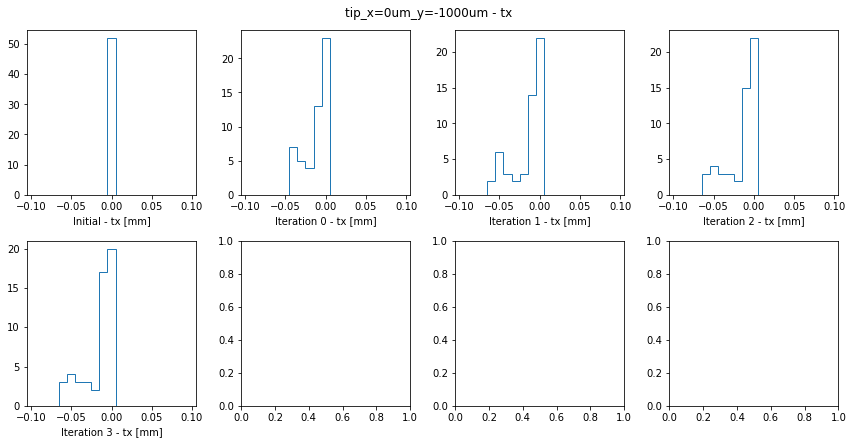

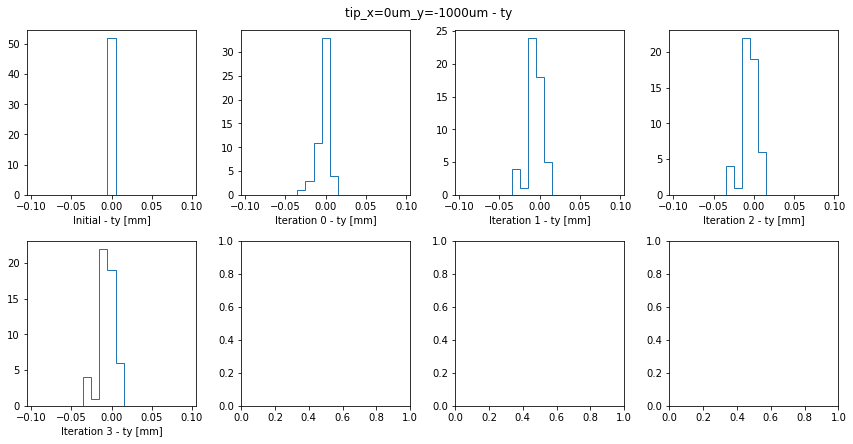

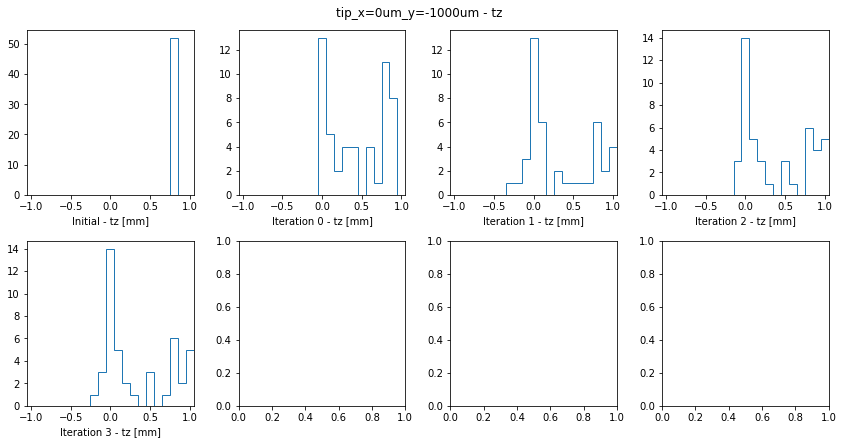

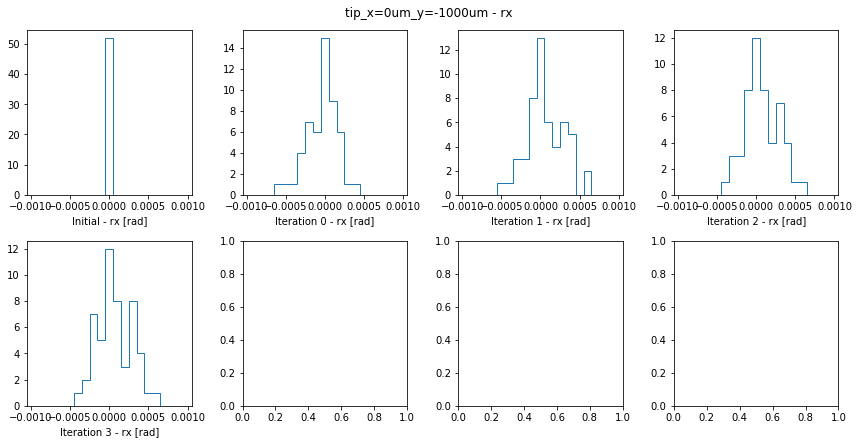

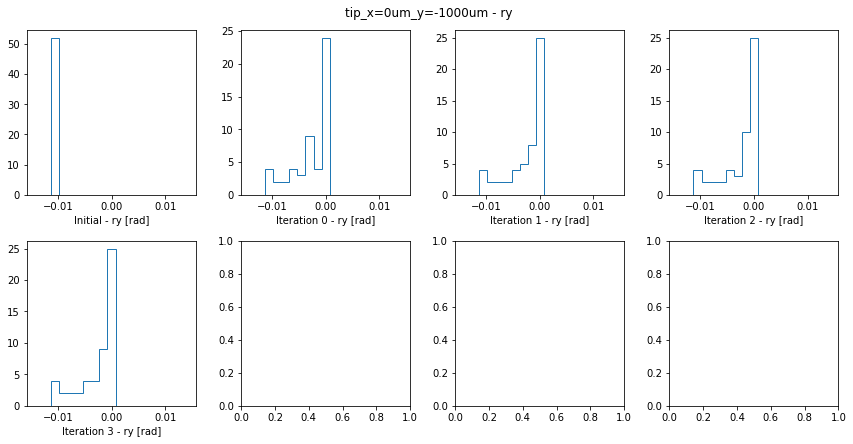

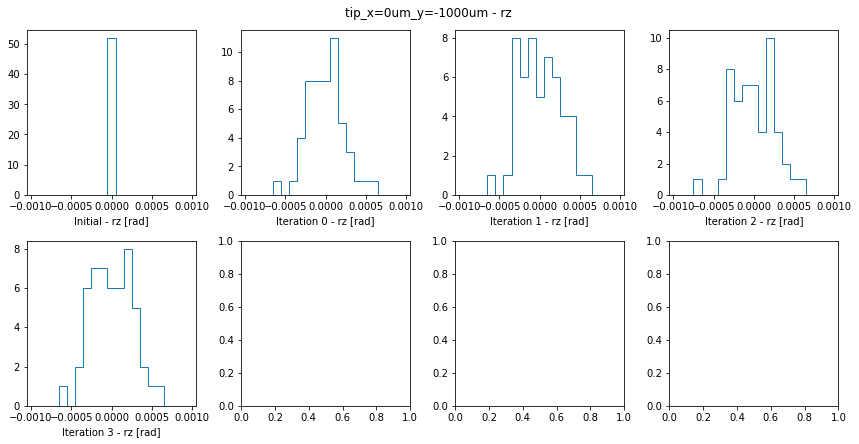

In [9]:
plot('tip_x=0um_y=-1000um')